# 1 - Algoritmos de Clasificación

### 1.1 Entrenar un Perceptrón

#### Usamos el dataset de Iris
Sigue la regla del perceptron de Rosenblatt. Imita como trabajaria una sola neurona.
Inicia los paso a 0 o numeros aleatorios pequeños
Para cada muestra de entrenamiento calcula el valor de salida y, y actualiza lo spesos.

In [16]:
#Importamos la dataset 
import pandas as pd
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()




In [28]:
#En nuestra variable dependiente (y) dejamos las etiquetas, 
#En X dejamos las variables dependientes, 
X=iris.data[:,[2,3]]
y=iris.target

In [30]:
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


### Dividir la muestra en entrenamiento y test

In [33]:
#Dividmos en conjunto de entranimiento y conjunto de prueba
#Dividimos de forma aleatorio la smatrices X e y en un 30% de datos de prueba y un 70% datos de entrenamiento
#La function ya mezcla los conjuntos de entrenamiento internamente antes de realizar la division 
#Con random_state damos una semilla aleatoria fija - este es un numero pseudo aleatorio interno que se usa para mezclar los conjuntos de datos
#antes de su division. Garantiza resultados reproducibles.
#Por ultimo stratify = y aprovecha el soporte integrado para la estratificacion  : el modelo devuelve conjuntos de prueba y entrenamiento
#con las mismas proporcionesque las etiquets de clases de el conjunto de entrada
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [36]:
print('Labels counts in y:', np.bincount(y_test))

Labels counts in y: [15 15 15]


### Extraccion y escalado (normalizacion) de caracteristicas

In [37]:
# Vamos a normalizar las caracteristicas

In [45]:
# Con el modulo fit, StandardScaler ha estimado mu and sigma para cada dimension de caracteristicas de los datos de entranmiento. 
#transform ha normalizado los datos de entrenamiento mediante estos aprametrocs.
#Esos mismos parametros se han usado para normalizar el conjunto de prueba, 
#asi ambos valores entre prueba y entrenamiento son comparables. 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

### Entrenamiento de Model (en train )

In [46]:
from sklearn.linear_model import Perceptron

#Iniciamos objeto perceptron, y lo entrenamos con fit. eta0 = rango aprendizaje, 

ppn=Perceptron(max_iter=40, eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

### Predicciones y comparacion de predichos con observados (en muestra de test)

In [58]:
#Podemos predecir mediante el predict
y_pred=ppn.predict(X_test_std)
#(y_test!=y_pred).sum()
print('Misclassified samples:')
(y_test!=y_pred).sum()

Misclassified samples:


1

### Mediciones de rendimiento

In [59]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f' % accuracy_score(y_test,y_pred))

Accuracy:0.98


C:\Users\pradi\AppData\Local\Temp\ipykernel_7860\3338423692.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

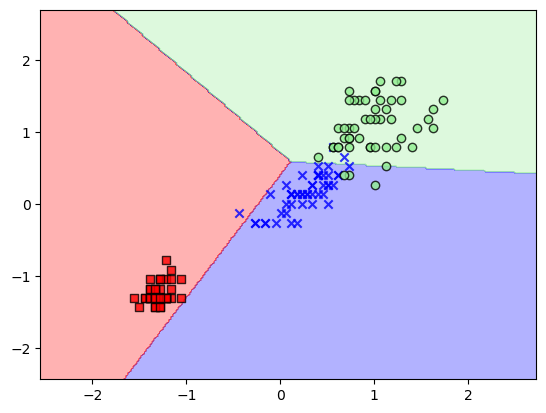

In [60]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # define generador de marcador y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # representa la superficie de decisión 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # destaca las muestras de prueba 
    if test_idx:
        # representa todas las muestras 
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


# Entrenar un modelo de perceptrón con los datos de entrenamiento estandarizados:

# En[13]:


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()


NameError: name 'classifier' is not defined

#### Conclusion: El mayor inconveniente del perceptronunico es que nunca converge si als clases no osn eprfectametne separables linealmente. Podemos pensar que la razón por la qu elo spesos se actualizan constantemente es que siempre existe como minimo una muestra clasificada erróneamente en cada epoca. La regresi'ón lofistica es un algoritmomejor para problemas de clasificaion binaria. Es un modelo de clasificaion, no regresion. 

# Regresión Logística

#### Leer y estudiar la regresión logística y como usa el gradiente descendente del libro de StatsQuest.

La regresion logistica es unmodelo de lineal para clasificacion BINARIA que puede usarse para clasificacion multiclase.
Repaso, pasos para implementar un modelo:
1)LOAD DATA
2)SPLIT DATA (X train,y train, X test, y test)
3)Extract features from X_train, escalar y normalizar. Normalizar y_train
4)DEFINE THE MODEL and FIT on X Train and y train
5)PREDICT on X test 
6)COMPARE forecasted results vs. Observed (y_test)

In [102]:
from sklearn.linear_model import LogisticRegression

#Usamos los datos de arriba, asi que ya tenemos la smuestra de entramiento y test creadas

#2 - DEfinimos el model

lr=LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std,y_train)
lr.predict(X_test_std[:3,:])


#Las tres primeras muestras se han clasificado a aprtir de la probabilidad predicha. La probabilidad mas alta es la que define a que clase 
#pertenece

#En este caso Iris virginica, Iris Setosa e Iris Setosa

array([2, 0, 0])

In [100]:
#Predict probabilities de las primeras 3 flores en la muestra. Siendo 0 Iris Setosa, 1 Iris versicolor  , 2 Iris virginica
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

C:\Users\pradi\AppData\Local\Temp\ipykernel_7860\3338423692.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

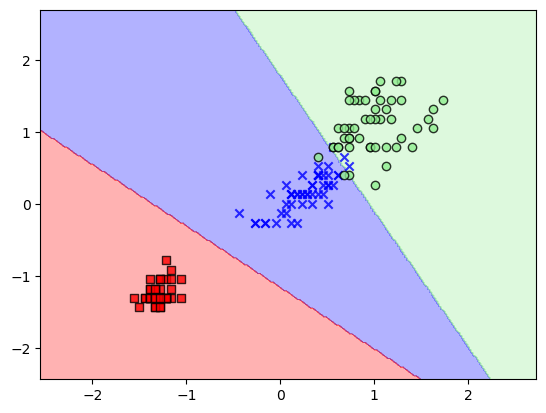

In [103]:
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal_width[standardrized]')
plt.show()